## RETRIEVING HOUSING DATA FROM SOURCE USING A FUNCTION

In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

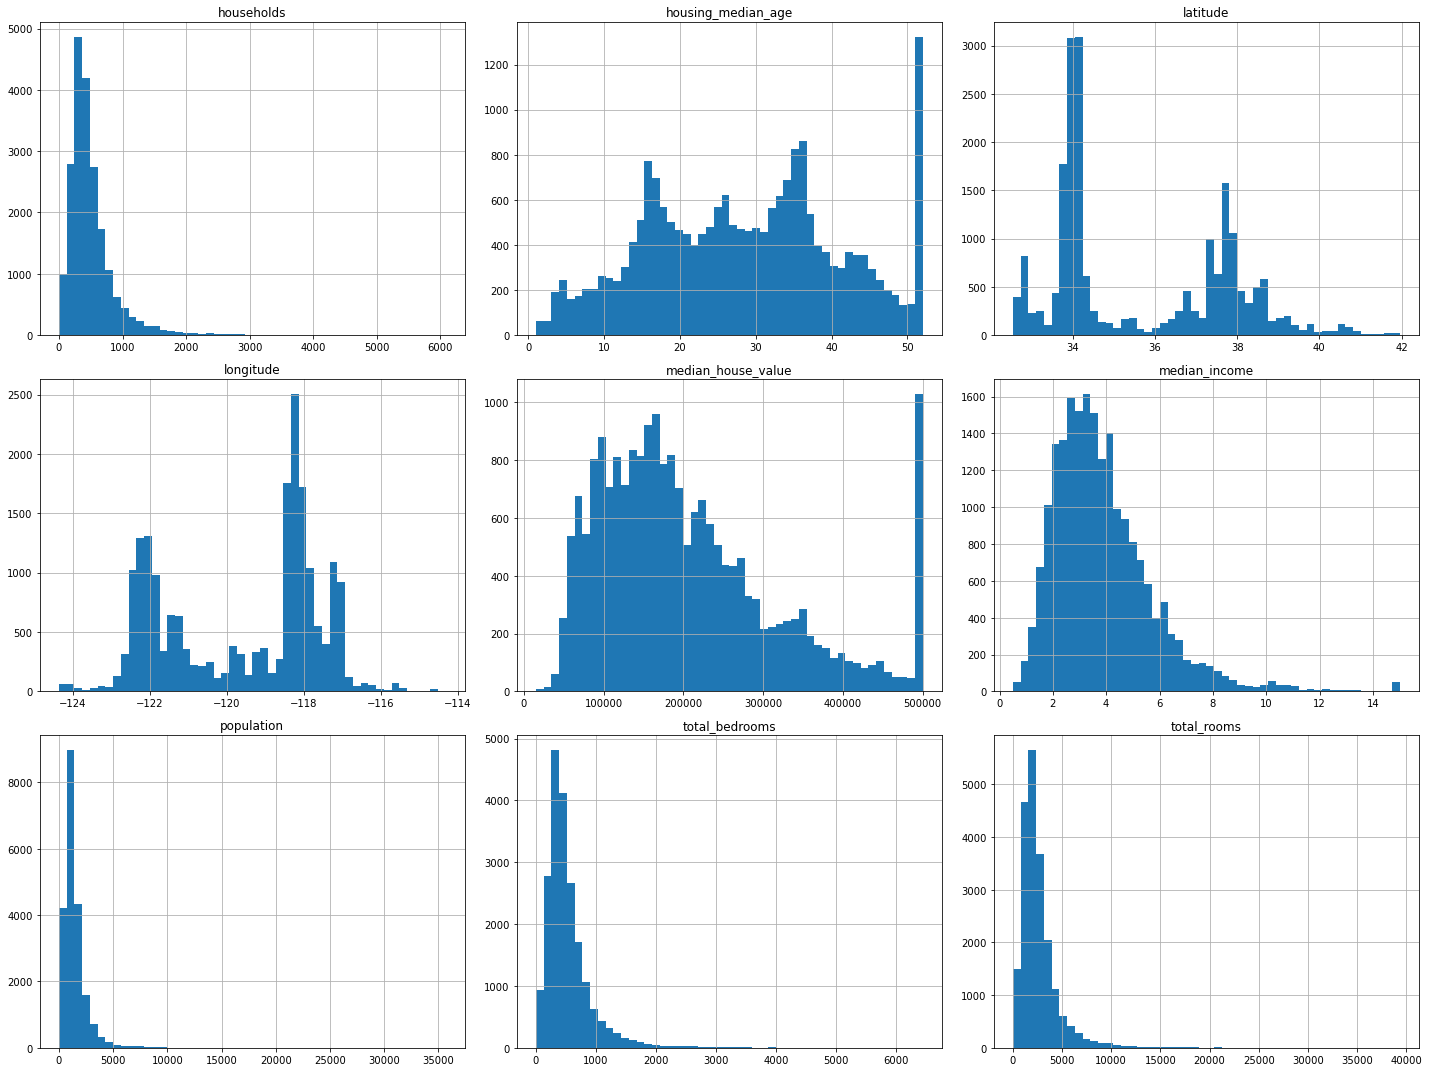

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.tight_layout()

## CREATING 20% TEST SET FROM THE ORIGINAL DATA SET

In [12]:
import numpy as np

In [13]:
np.random.seed(42) # Using this we can achieve same Testing and Training Set, everytime we split the data by shuffling

In [14]:
def split_data_set(data,ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_size = int(len(data)*ratio)
    test_set = shuffled_indexes[:test_size]
    train_set = shuffled_indexes[test_size:]
    return (test_set,train_set)

In [15]:
test_set, train_set = split_data_set(housing, 0.2)

In [16]:
print("Training Set is : {1} and Testing Set is : {0}".format(len(test_set),len(train_set)))

Training Set is : 16512 and Testing Set is : 4128


In [17]:
# Better Version of splitting the data, It can also control the splitting of UPDATED DATA
import hashlib

In [18]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [19]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
housing_with_id = housing.reset_index() # Adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
print(len(train_set),len(test_set))

16362 4278


In [22]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing_with_id["index"] = housing["longitude"] * 1000 + housing["latitude"]

In [24]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
# A BETTER WAY TO SPLIT DATASETS FOR TRAINING AND TESTING PURPOSES USING SCIKIT-LEARN (SKLEARN) MODULE
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [27]:
print(len(test_set),len(train_set))

4128 16512


In [28]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) # Grouping the DATA for UNBIASED SAMPLING

In [29]:
housing["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [30]:
housing["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [31]:
housing["income_cat"].where(cond=housing["income_cat"]<5,other=5.0,inplace=True) # Merging all the categories greater than 5.0 with 5.0

In [32]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit # Splitting for UNBIASED SAMPLING

In [34]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [35]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [36]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [37]:
strat_test_set.drop(labels="income_cat",axis=1,inplace=True)

In [38]:
strat_test_set # KEEPING THE TEST SET SAFE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [39]:
strat_train_set.drop("income_cat",axis=1,inplace=True)

In [40]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [41]:
housing = strat_train_set.copy()

In [42]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


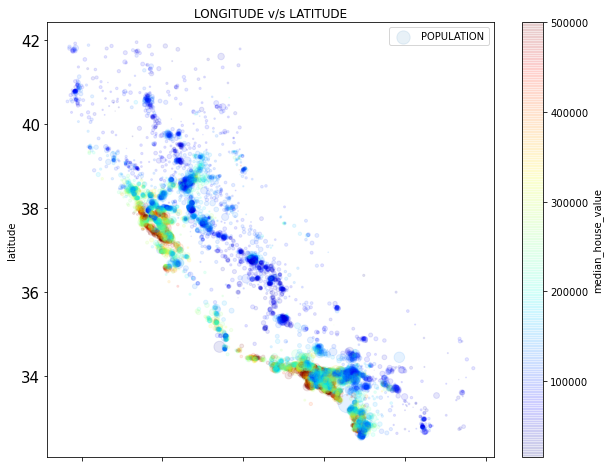

In [43]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=housing["population"]/100,label="POPULATION",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,figsize=(10,8),fontsize=15,title="LONGITUDE v/s LATITUDE")
plt.legend()

In [44]:
corr_matrix = housing.corr()

In [45]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The Output provides Realtion between the "MEDIAN_HOUSE_VALUE" with all other attributes. When the value is close to 1, it means the "MEDIAN_HOUSE_VALUE" has very Strong Positive Corelation with that attribute and when the value is close to -1, it means the "MEDIAN_HOUSE_VALUE" attr has very Strong Negative Corelation with that attribute. We will plot this Standard Corelation Coefficient using Pandas

In [47]:
from pandas.plotting import scatter_matrix

In [48]:
attr = ["median_house_value","median_income","total_rooms","housing_median_age"]

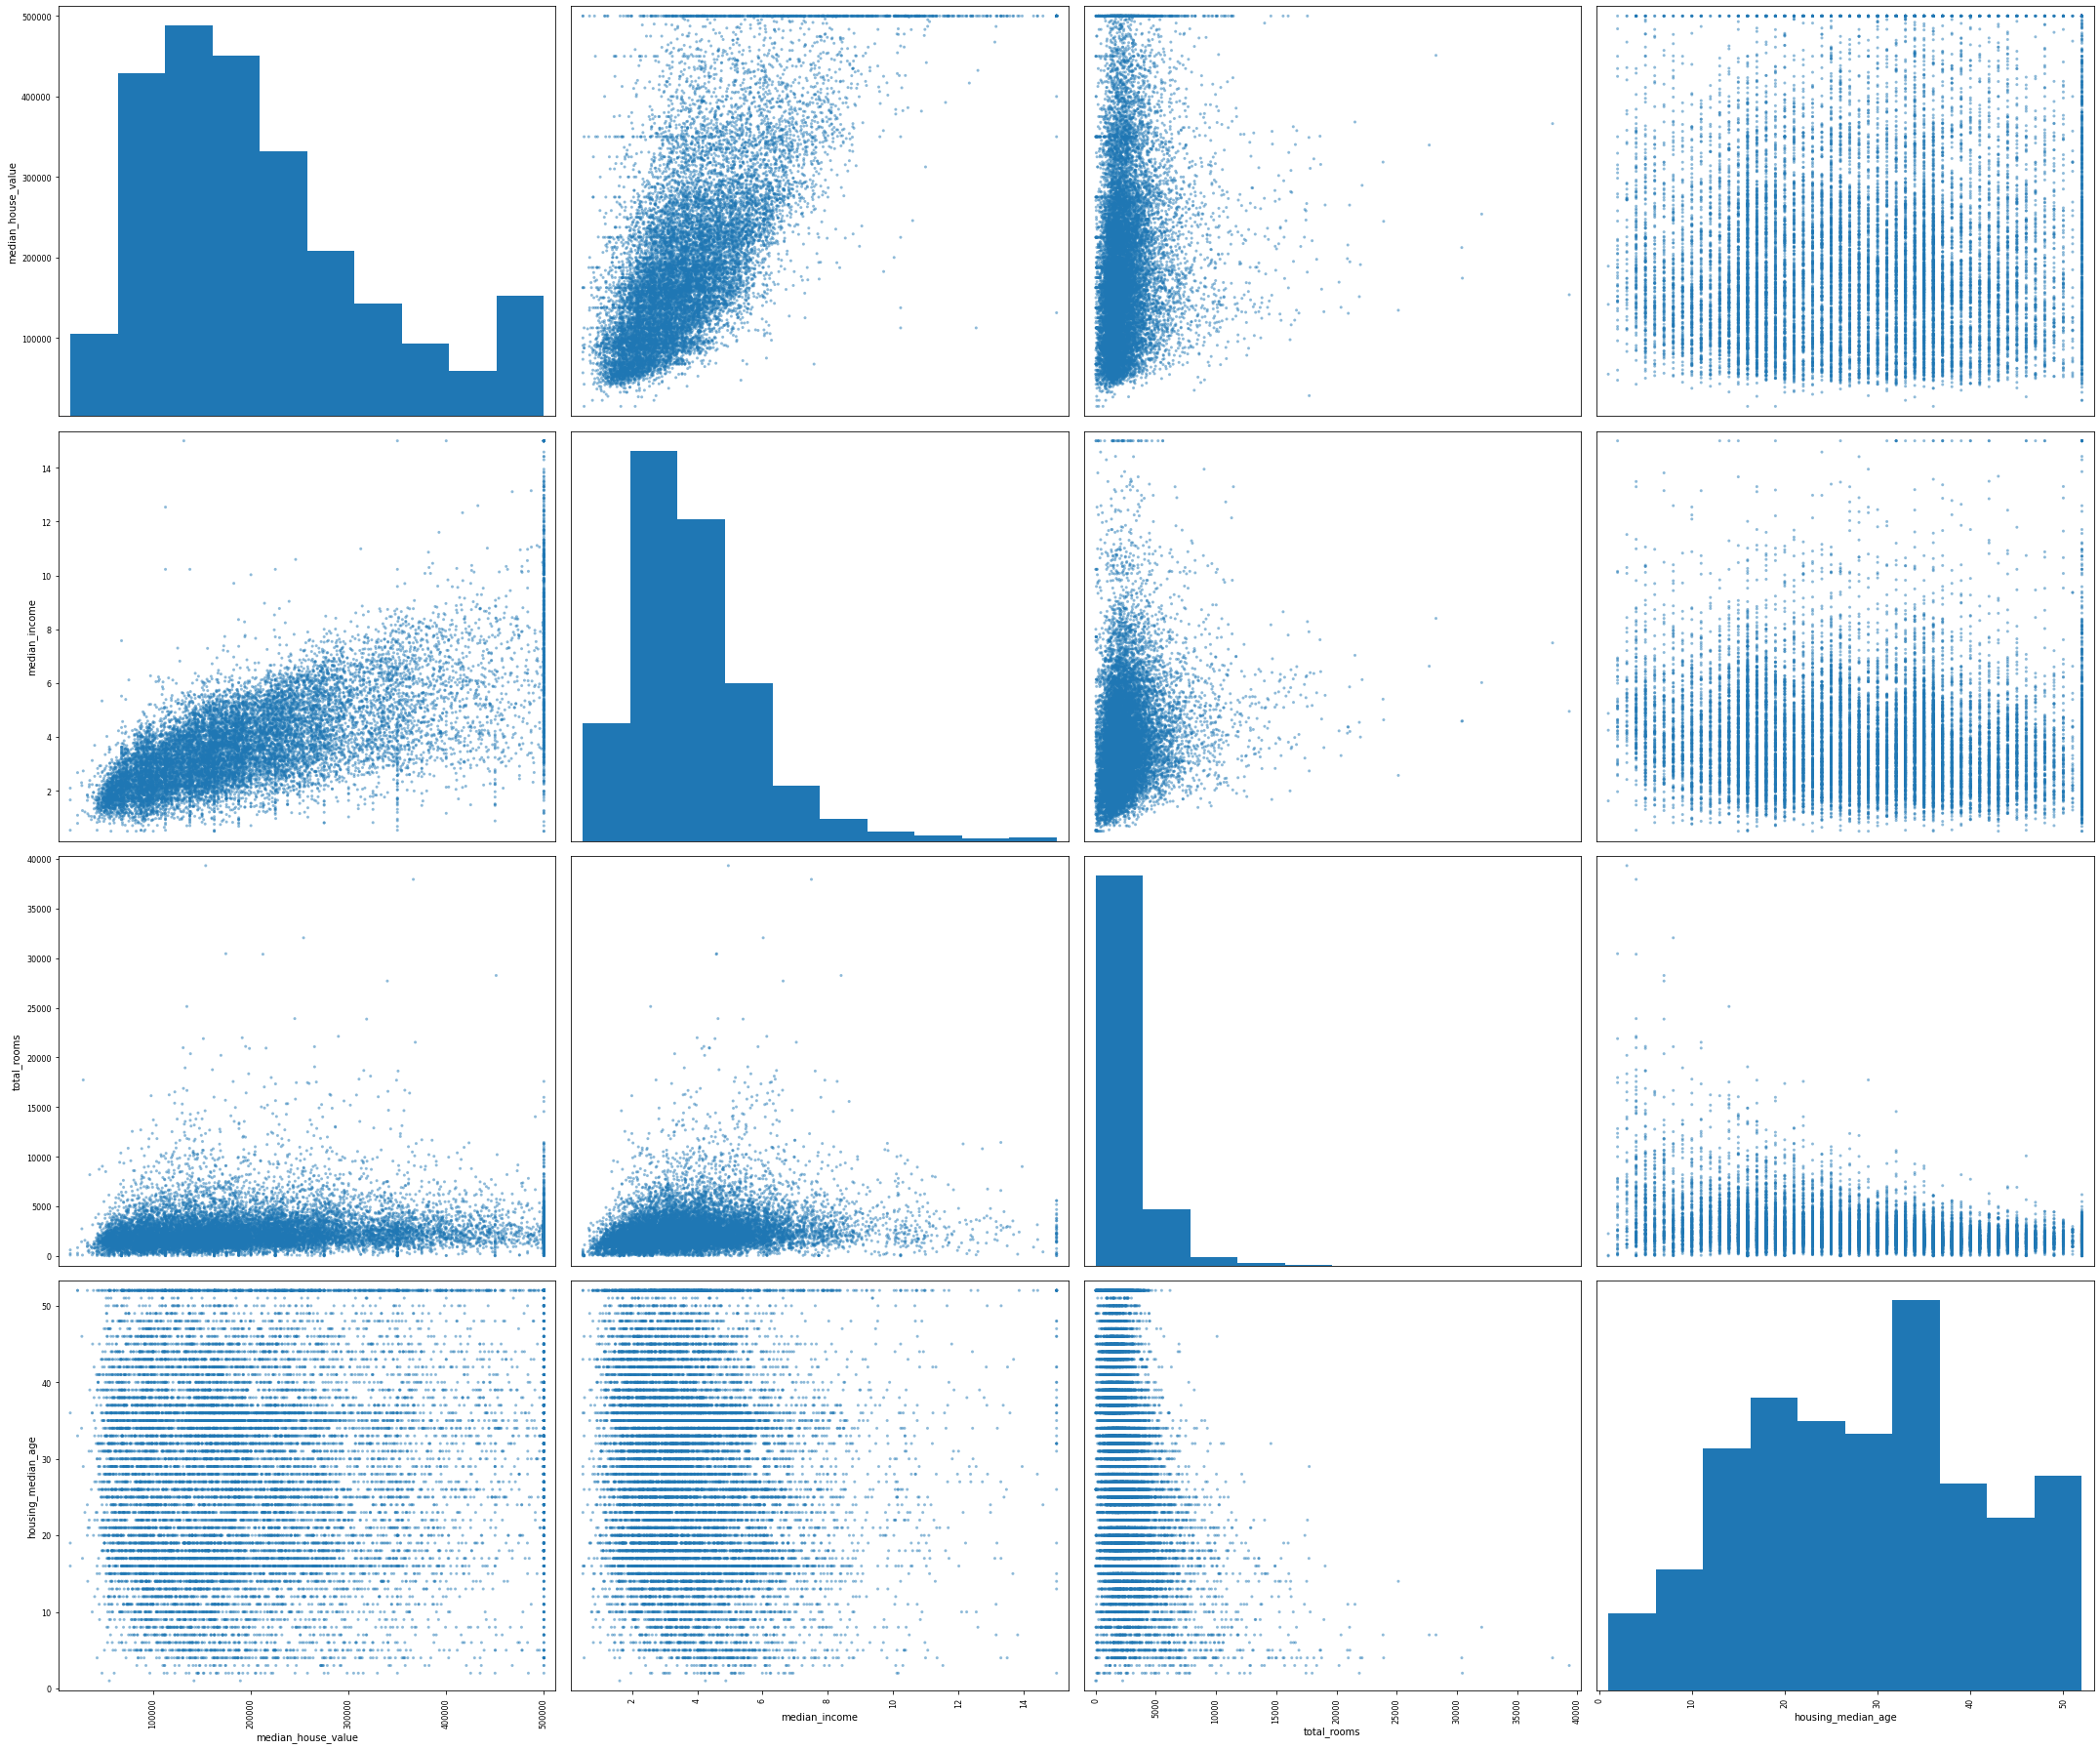

In [49]:
scatter_matrix(housing[attr],figsize=(30,25))
plt.tight_layout()

Since, it is useless to plot the Y-axes attr against the same attr on X-axes, so Pandas just plot a histogram for same attributes.
Now, the Most Promising attribute to predict "MEDIAN HOUSE VALUE" is "MEDIAN INCOME", since it has the highest corelation with the "MEDIAN HOUSE VALUE"

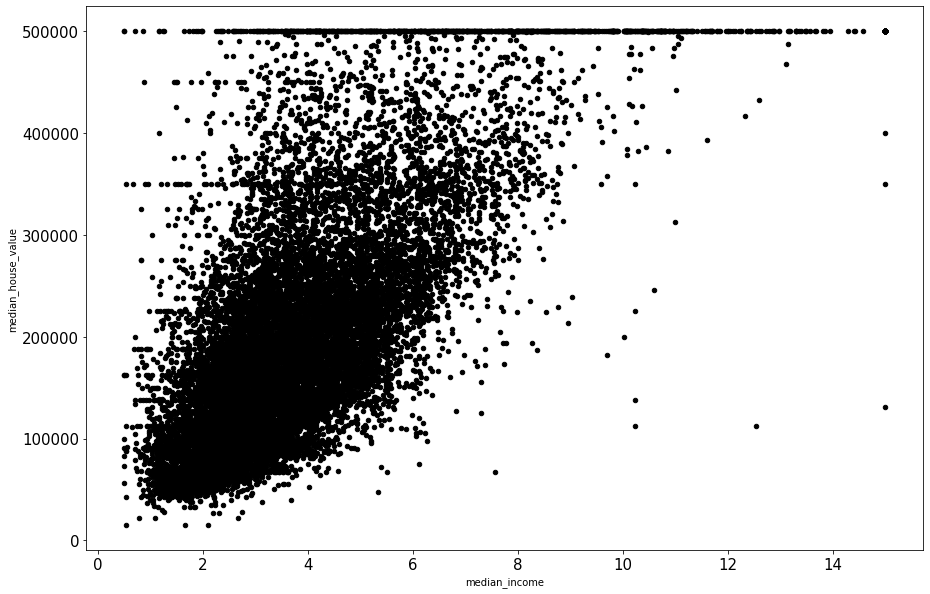

In [50]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",figsize=(15,10),fontsize=15,color="black")

In [51]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [52]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,5.505618,0.193878,3.808989


In [53]:
corr_matrix = housing.corr()

In [54]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## PREPARING DATA FOR ML ALGORITHMS

In [55]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [56]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


## PREPROCESSING DATA

In [58]:
# DEALING WITH NAN VALUES IN DF
from sklearn.impute import SimpleImputer

In [59]:
# For Dealing with NAN Values, first we have to remove the Non-Int (Text) Columns
housing_num = housing.drop(labels="ocean_proximity",axis=1)

In [60]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [61]:
imputer = SimpleImputer(strategy="median")

In [62]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [63]:
X = imputer.transform(housing_num) # Array containing only Numbers

In [64]:
# So, we have to process the Numbered Array to get our Data
housing_tr = pd.DataFrame(data = X,columns = housing_num.columns)

In [65]:
housing_tr.info() # This is the Housing DataFrame without and non-number columns, where nan's are replaced by Median Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [66]:
housing_cat = housing["ocean_proximity"]

In [67]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
encoder = LabelEncoder()

In [70]:
encoder.fit(housing_cat)

LabelEncoder()

In [71]:
housing_cat_encoded = encoder.transform(housing_cat) # We us do this in one step using encoder.fit_transform(data)

In [72]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [73]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [74]:
housing_cat_encoded.shape

(16512,)

In [75]:
housing_cat_encoded.reshape(-1,1) # OR --> housing_cat_encoded.reshape(len(housing_cat_encoded),1)

array([[0],
       [0],
       [4],
       ...,
       [1],
       [0],
       [3]])

In [76]:
# ONE-HOT-ENCODING
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [77]:
housing_cat_1hot_encoded = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [78]:
housing_cat_1hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [79]:
type(housing_cat_1hot_encoded)

scipy.sparse.csr.csr_matrix

In [80]:
housing_cat_1hot_encoded.toarray() # Result is a SciPy Sparse Matrix which is memory efficient

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [81]:
encoder.categories_

[array([0, 1, 2, 3, 4])]

In [82]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True) # SciPy Sparse Matrix is memory Efficient

In [83]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object

In [84]:
housing_cat_1hot_encoded_usingLB = encoder.fit_transform(housing_cat)

In [85]:
type(housing_cat_1hot_encoded_usingLB)

scipy.sparse.csr.csr_matrix

In [86]:
housing_cat_1hot_encoded_usingLB.toarray()

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int32)

In [87]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

In [89]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [90]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # Inherits BaseEstimator and TransformerMixin Classes
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room] # Column Stack
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [91]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= True)

In [92]:
Housing_extra_attr = attr_adder.fit_transform(housing.values)

In [93]:
Housing_extra_attr[:3]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258,
        0.24129098360655737]], dtype=object)

In [94]:
housing["total_rooms"].min()

6.0

In [95]:
housing["total_rooms"].max()

39320.0

In [96]:
housing["median_income"].min()

0.4999

In [97]:
housing["median_income"].max()

15.0001

In [98]:
from sklearn.preprocessing import StandardScaler # Feature Scaling Module/Class

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
housing_num.head() # Data without "OCEAN-PROXIMITY" Categorical Field/Column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [101]:
housing_num.info() # Contains Missing/NAN parameters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [102]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                         ('attr_adder',CombinedAttributesAdder()),
                         ('std-scaler',StandardScaler())])

In [103]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attr_adder', CombinedAttributesAdder()),
                ('std-scaler', StandardScaler())])

In [104]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [105]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [106]:
# Custom Transformer - DataFrame Selector
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attr_list):
        self.attr_list = attr_list
    def fit(self,X, y=None):
        return self
    def transform(self,X):
        return X[self.attr_list].values

In [107]:
# Data to be passed for pipelines corresponding to the pipline into DataFrameSelector
num_attr = list(housing_num)
cat_attr = "ocean_proximity"

In [108]:
from sklearn.preprocessing import StandardScaler # Feature Scaling Module/Class
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attr)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attr_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [109]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [110]:
from sklearn.preprocessing import LabelBinarizer
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attr)),
    ('label_binarizer',MyLabelBinarizer()),
])

In [111]:
# COMBINED PIPELINE
from sklearn.pipeline import FeatureUnion

In [112]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [113]:
# RUNNING FULL PIPELINE
housing_prepared = full_pipeline.fit_transform(housing)

In [114]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [115]:
housing_prepared.shape

(16512, 16)

In [116]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [117]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

## TRAINING AND EVALUATING ON TRAINING SET - LINEAR REGRESSION MODEL

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
linear_reg = LinearRegression()

In [120]:
linear_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [121]:
some_data = housing.iloc[:5]

In [122]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [123]:
some_labels = housing_labels.iloc[:5]

In [124]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [125]:
some_data_prepared = full_pipeline.transform(some_data)

In [126]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [127]:
print("PREDICTIONS:\t",linear_reg.predict(some_data_prepared))
print("LABELS:\t\t",list(some_labels))

PREDICTIONS:	 [210656. 317792. 211328.  59168. 189824.]
LABELS:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [128]:
housing_predictions = linear_reg.predict(housing_prepared)

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
lin_mse = mean_squared_error(housing_labels,housing_predictions)

In [131]:
lin_mse

4709984394.348171

In [132]:
lin_rmse = np.sqrt(lin_mse)

In [133]:
lin_rmse

68629.3260519741

## TRAINING AND EVALUATING ON TRAINING SET - DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [136]:
housing_predictions = tree_reg.predict(housing_prepared)

In [137]:
housing_predictions

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [138]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [139]:
tree_mse = mean_squared_error(housing_labels,housing_predictions)

In [140]:
tree_rmse = np.sqrt(tree_mse)

In [141]:
tree_rmse

0.0

## Cross Validation using cross_val_score - K-Folds

In [142]:
from sklearn.model_selection import cross_val_score # Cross-Validation Feature by K-Folds

In [143]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [145]:
rmse_scores = np.sqrt(-scores)

In [152]:
def display_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation :",scores.std())

In [153]:
display_scores(rmse_scores)

Scores :  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean :  70666.74616904806
Standard Deviation : 2928.322738055112


In [155]:
linear_regg_score = cross_val_score(linear_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [156]:
linear_reg_rmse = np.sqrt(-linear_regg_score)

In [157]:
display_scores(linear_reg_rmse)

Scores :  [66757.24872434 66955.549825   70347.95244419 74753.19435503
 68028.34987393 71193.84183426 64988.67337893 68272.67633576
 71551.23476165 67665.7126089 ]
Mean :  69051.44341419876
Standard Deviation : 2734.3257892610804


In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rd_fst_reg = RandomForestRegressor()

In [160]:
rd_fst_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [161]:
rd_fst_reg_predictions = rd_fst_reg.predict(housing_prepared)

In [162]:
rd_fst_reg_predictions

array([266909.  , 332255.02, 215082.  , ..., 106694.  , 207037.  ,
       470369.7 ])

In [163]:
rd_fst_mse = mean_squared_error(housing_labels,rd_fst_reg_predictions)

In [164]:
rd_fst_mse

348953392.9026591

In [165]:
rd_fst_rmse = np.sqrt(rd_fst_mse)

In [166]:
rd_fst_mse

348953392.9026591

In [168]:
rd_fst_scores = cross_val_score(rd_fst_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [169]:
rd_fst_reg_rmse = np.sqrt(-rd_fst_scores)

In [170]:
display_scores(rd_fst_reg_rmse)

Scores :  [49441.88337753 47777.73204362 50152.73250996 52309.69632214
 49928.00081281 53575.76667059 48714.41526006 47888.77372255
 52960.63083376 50202.2397558 ]
Mean :  50295.18713088253
Standard Deviation : 1935.049623865148


In [175]:
# Saving our model in disk
# JOBLIB provides "dump" and "load" method for Importing to disk and Loading the instances
import joblib

In [176]:
joblib.dump(linear_reg,"linear_reg_model.pkl")

['linear_reg_model.pkl']

In [177]:
joblib.dump(tree_reg,"decisiontree_reg_model.pkl")

['decisiontree_reg_model.pkl']

In [178]:
joblib.dump(rd_fst_reg,"randomforest_reg_model.pkl")

['randomforest_reg_model.pkl']

## Fine Tuning of Model using GridSearchCV

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    }
]

In [183]:
foresr_reg = RandomForestRegressor()

In [184]:
foresr_reg

RandomForestRegressor()

In [187]:
grid_search = GridSearchCV(foresr_reg,param_grid,cv=5,scoring="neg_mean_squared_error")

In [188]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [189]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [190]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [191]:
grid_search.cv_results_

{'mean_fit_time': array([0.12026787, 0.37300286, 1.4589191 , 0.24933424, 0.67240686,
        1.74294877, 0.23557601, 0.78290482, 2.40378656, 0.30000319,
        1.00111003, 2.97206621, 0.17833033, 0.58345656, 0.2288022 ,
        0.74859362, 0.28184552, 0.92323356]),
 'std_fit_time': array([0.00669949, 0.0063371 , 0.4434487 , 0.1146963 , 0.12141963,
        0.01254198, 0.00723447, 0.00685148, 0.09327239, 0.00670977,
        0.0077118 , 0.0193956 , 0.0018098 , 0.00848181, 0.00355378,
        0.00359249, 0.00491887, 0.01408938]),
 'mean_score_time': array([0.00579615, 0.01376486, 0.03669763, 0.00658255, 0.01355877,
        0.03749909, 0.00517931, 0.01336579, 0.03768992, 0.00498695,
        0.01377854, 0.03791456, 0.00538611, 0.01535358, 0.00538669,
        0.01537466, 0.00578566, 0.01515379]),
 'std_score_time': array([2.15171240e-03, 4.00562882e-04, 7.47567331e-04, 2.04711500e-03,
        4.84304622e-04, 1.00935967e-03, 3.87091947e-04, 8.00733082e-04,
        9.75690812e-04, 1.19113884e-

In [192]:
 cvres = grid_search.cv_results_

In [196]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65134.19556099879 {'max_features': 2, 'n_estimators': 3}
56221.336258215575 {'max_features': 2, 'n_estimators': 10}
53111.07552408916 {'max_features': 2, 'n_estimators': 30}
59390.114903910624 {'max_features': 4, 'n_estimators': 3}
53033.02060599536 {'max_features': 4, 'n_estimators': 10}
50600.043725914904 {'max_features': 4, 'n_estimators': 30}
58422.91805643469 {'max_features': 6, 'n_estimators': 3}
52414.88170246955 {'max_features': 6, 'n_estimators': 10}
50283.46039189707 {'max_features': 6, 'n_estimators': 30}
58293.8477966356 {'max_features': 8, 'n_estimators': 3}
51986.42753379401 {'max_features': 8, 'n_estimators': 10}
49818.955990570365 {'max_features': 8, 'n_estimators': 30}
62518.837595874604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54928.61331543096 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59759.39011879753 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52809.494855736855 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [199]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [200]:
feature_importances

array([6.80948054e-02, 6.38645334e-02, 4.46522483e-02, 1.51771696e-02,
       1.40251847e-02, 1.50901497e-02, 1.48932384e-02, 3.91560272e-01,
       4.14872194e-02, 1.10455004e-01, 5.66185173e-02, 1.04316741e-02,
       1.47829324e-01, 1.27599924e-04, 1.85397682e-03, 3.83908360e-03])

In [201]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [203]:
cat_one_hot_attribs = list(encoder.classes_)

In [205]:
attributes = num_attr + extra_attribs + cat_one_hot_attribs

In [206]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [230]:
rel = zip(feature_importances,attributes)

In [231]:
rell = list(rel)

In [232]:
rell # This Gives the importance of The atttributes in order

[(0.06809480540444453, 'longitude'),
 (0.06386453343083213, 'latitude'),
 (0.044652248306849676, 'housing_median_age'),
 (0.015177169595893467, 'total_rooms'),
 (0.014025184717269623, 'total_bedrooms'),
 (0.01509014965933033, 'population'),
 (0.014893238393338785, 'households'),
 (0.3915602721031066, 'median_income'),
 (0.041487219357065126, 'rooms_per_hhold'),
 (0.11045500368904647, 'pop_per_hhold'),
 (0.05661851726248411, 'bedrooms_per_room'),
 (0.010431674065334443, '<1H OCEAN'),
 (0.14782932366728732, 'INLAND'),
 (0.000127599924214202, 'ISLAND'),
 (0.0018539768241349432, 'NEAR BAY'),
 (0.0038390835993682153, 'NEAR OCEAN')]

## Evaluating your model on Test Set

In [234]:
final_model = grid_search.best_estimator_

In [235]:
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [236]:
X_test_prepared = full_pipeline.transform(X_test)

In [238]:
final_predictions = final_model.predict(X_test_prepared)

In [239]:
final_predictions

array([493214.06666667, 269410.        , 217756.7       , ...,
       321393.4       , 156723.33333333, 132253.33333333])

In [240]:
final_mse = mean_squared_error(y_test,final_predictions)

In [243]:
final_rmse = np.sqrt(final_mse)

In [244]:
final_rmse

47851.27088760373